In [114]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup complete...")

Setup complete...


In [115]:
asd = pd.read_csv("../input/Toddler Autism dataset July 2018.csv")
print("Dataset loaded...")

Dataset loaded...


In [116]:
asd.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [117]:
asd.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [118]:
asd.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [119]:
asd.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object

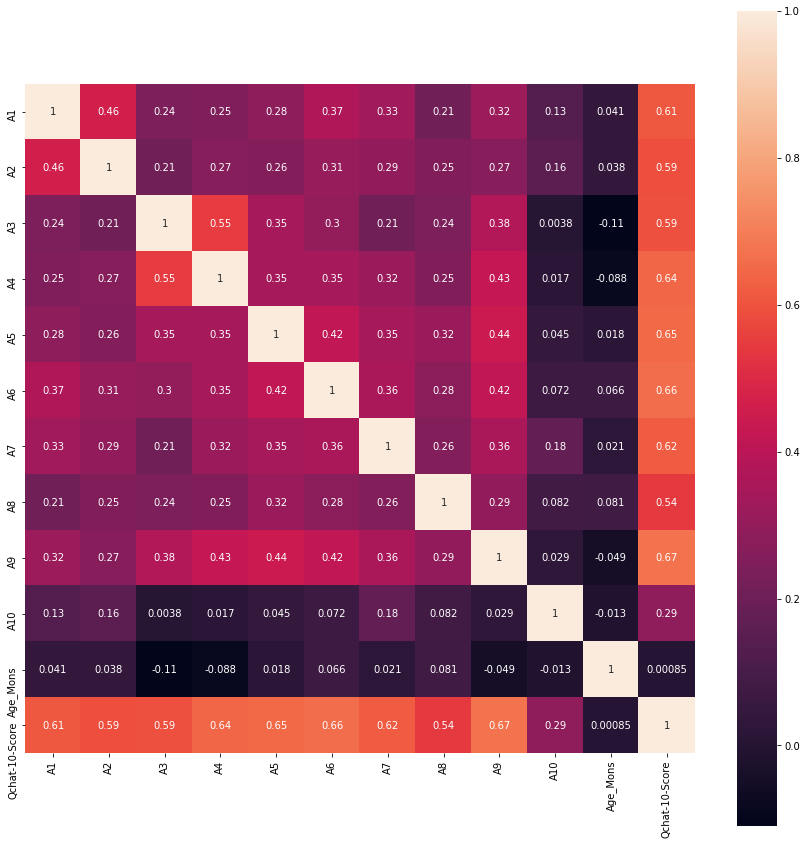

In [120]:
corr = asd.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

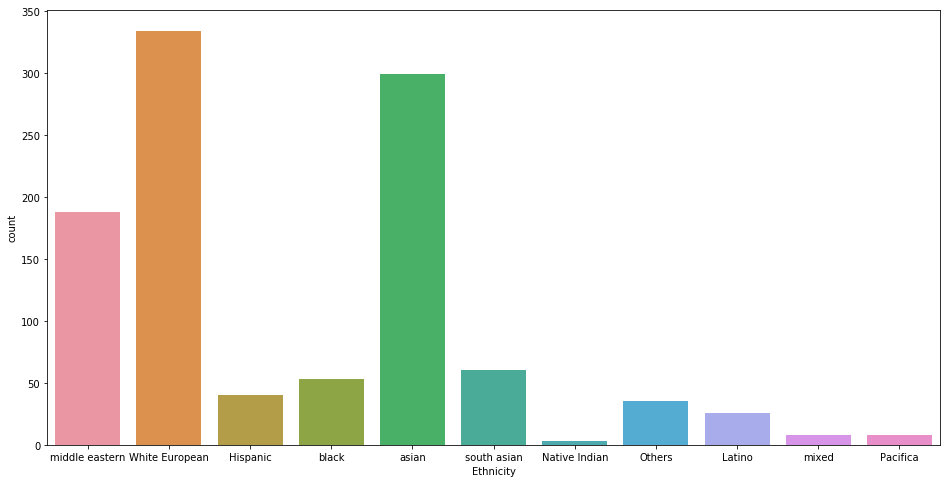

In [121]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = asd)

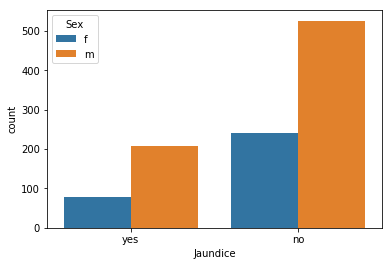

In [122]:
sns.countplot(x = 'Jaundice', hue = 'Sex', data = asd)

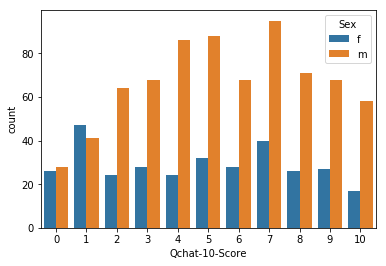

In [123]:
sns.countplot(x = 'Qchat-10-Score', hue = 'Sex', data = asd)

In [124]:
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [125]:
asd.drop('Qchat-10-Score', axis = 1, inplace = True)

In [126]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    asd[col] = le.fit_transform(asd[col])
asd.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Sex                    int64
Ethnicity              int64
Jaundice               int64
Family_mem_with_ASD    int64
Class/ASD Traits       int64
dtype: object

In [127]:
X = asd.drop(['Class/ASD Traits '], axis = 1)
Y = asd['Class/ASD Traits ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)

In [128]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    print(name, accuracy_score(y_test, pred))

LR 0.9715639810426541
LDA 0.95260663507109
KNN 0.9052132701421801
CART 0.9383886255924171
NB 0.9478672985781991
SVM 0.9383886255924171
RF 0.8436018957345972
XGB 0.981042654028436
GBR 0.6255924170616114
ABR 0.41232227488151657


**Tuning hyperparametres for SVC**

In [129]:
svc = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(x_train, y_train)
clf.best_params_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.1s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] .

[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.8, kernel=linear ...................................
[CV] .................... C=1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.8, kernel=linear ...................................
[CV] .

[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.1, kernel=linear ...................................
[CV] .

[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.4, kernel=linear ...................................
[CV] .

[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.3, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=1.3, gamma=0.8, kernel=linear .................................
[CV] .

[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.3, gamma=1.1, kernel=linear, total=   0.0s
[CV] C=1.3, gamma=1.1, kernel=linear .................................
[CV] .

[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.3, gamma=1.4, kernel=linear, total=   0.0s
[CV] C=1.3, gamma=1.4, kernel=linear .................................
[CV] .

[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.9, kernel=linear .................................
[CV] .

[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.2, kernel=linear .................................
[CV] .

[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s


[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed:   51.2s finished


{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

In [130]:
# Re-running model with best parametres
svc1 = SVC(C = 0.8, gamma = 0.1, kernel = 'linear')
svc1.fit(x_train, y_train)
pred = svc1.predict(x_test)
print(accuracy_score(y_test, pred))

1.0
